# A Python short course on Atmospheric Data Analysis - Week 4 (final?)

This Python tutorial was written in July 2024 by Ludving Cano, Research Assistant at the [Laboratory for Atmospheric Physics](http://www.chacaltaya.edu.bo) - UMSA (lcano@chacaltaya.edu.bo). It shows some topics on plotting, such as plotting multiple series in one plot or automate plotting.

On **week 4** we will cover:

 - Plotting multiple series at the same time (same plot)
 - Creating a twin axis
 - Automate plot generation
 - Subplots (if we have time)

### Importing libraries
The libraries required for our duties today are:

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np #just in case
%matplotlib inline

### Our datasets

Today we'll work with the folder `data_FabForno`, an experimental side of last year, containing data for:
 1. **Black Carbon**, using the AE51 instrument
 2. **Particulate Matter** using the Airnote
 3. **Meteorological Variables** from the Davis Weather Station
 4. **Radiosonde data** [new] for the balloon data
 
As excercise, create paths for each one of these files below, as suggestion you can call the variables `[ìnstrument]_path` .

In [2]:
# create your paths here (all relative)
airnote_path = 'data_FabForno/Airnote_forno.csv'
ae51_path    = 'data_FabForno/AE51_forno_surface.dat'
davis_path   = 'data_FabForno/FabricaForno_Davis_WS.txt'

How to know if something exists? Remember the os.path.exists function

In [3]:
import os
os.path.exists(davis_path)

True

## 1. Plotting multiple series at the same time
So, last week we started doing some plots of one variable, if we wanted to inspect another variable we change the variable or create another plot. But it's very common for us to want to know the behaviour of two or more variables across time, this is important as we are not checking the **correlation** between these variables (yet, sometimes this isn't even important or easy to catch).

### 1.1. Example of PM
Last week we plotted the Particulate Matter variable, now our task is to create a plot of these three variables at the same time. This can be done in a similar way as before.

**Important** for this all the variables must be in the same units!


<b><font color="green" size=5>Recap: PM algorithm</font></b>

1. Copy your code form week 2 or 3 to open the Airnote
2. Unpack your variables (call the column) to the following:
  - pm1 for PM1
  - pm25 for PM2.5
  - pm10 for PM10
  - airnote_time for the datetime column (**must** contain a datetime-type column)

Estimated time: 5 minutes

In [4]:

airnote_data = pd.read_csv(airnote_path)

pm1 = airnote_data['PM1']
pm25 = airnote_data['PM2.5']
pm10 = airnote_data['PM10']

airnote_time = pd.to_datetime(airnote_data[['Year','Month',
                                           'Day','Hour','Minute']])


<details><summary><b><font color="green">Click here for the solutions</font></b></summary>

```
# reading the data
airnote_pth = 'data_FabForno/Airnote_forno.csv'
airnote = pd.read_csv(airnote_pth)

# getting the desired columns
airnote_time = pd.to_datetime(airnote[['Year','Month','Day','Hour','Minute']])
pm1 = airnote['PM1']
pm25 = airnote['PM2.5']
pm10 = airnote['PM10']

```

Now that we have the variables, let's plot them out

First we will create our plots, for now we'll do it simply by overlapping more `plt.plot()` to the same figure. 

Luckily, matplotlib will assign a different color for each new thing added, but it's important to add a label and a legend.

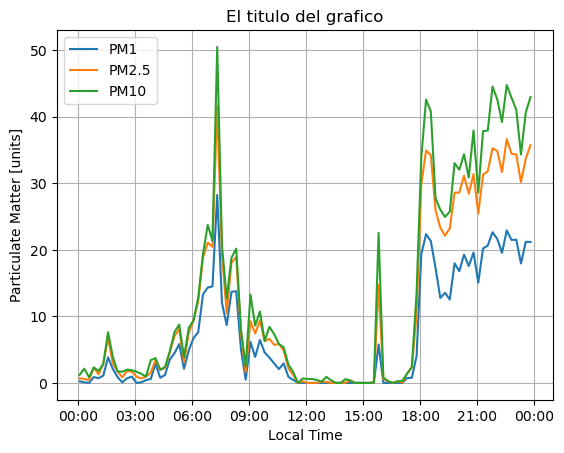

In [5]:
# Creating a figure, this will help if you work on scripts
plt.figure()

# Here plot all of the series
plt.plot(airnote_time, pm1, label = 'PM1')
plt.plot(airnote_time, pm25, label = 'PM2.5')
plt.plot(airnote_time, pm10, label = 'PM10')

# Setting up the time axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Adding a legend
plt.legend()

# Adding a grid (comment if you don't want it)
plt.grid()

# Here add the x and y labels, and the title
plt.xlabel('Local Time')
plt.ylabel('Particulate Matter [units]')
plt.title('El titulo del grafico')


# Exporting the figure
plt.savefig('figs/pm_airnote.png', dpi = 300)

<details><summary><b><font color="green">Click here for the solutions</font></b></summary>

```
# Plotting all the variables
plt.plot(airnote_time, pm1, label = 'PM1')
plt.plot(airnote_time, pm25, label = 'PM2.5')
plt.plot(airnote_time, pm10, label = 'PM10')


# Adding the x and y labels, and the title
plt.xlabel('Local Time')
plt.ylabel('Particulate Matter [$\mu g$]')

```
    

## 2. Plotting another variable in a twin axis
So, we want to know whether the PM varies with the temperature, so, we can plot them in the same figure BUT the units are going to be different! What to we do then? We can use the left y axis to put the units of the new variable and then it will fit.

First of all, let's read the Davis data using the data provided in the last week

**Important** replace the `davis_pth` with your path defined in the first step of this notebook

In [6]:
davis_pth = 'data_FabForno/FabricaForno_Davis_WS.txt'


davis = pd.read_csv(davis_pth, skiprows=2, sep = '\t', header = None)

#recreating the header
hd1, hd2 = [i.split('\t') for i in open('data_samples/FabricaForno_Davis_WS.txt').readlines()[:2]]
hdd = [(i+' '+j).strip() for i, j in zip(hd1, hd2)]

davis.columns = hdd
davis.head(3)

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Temp,In Hum,In Dew,In Heat,In EMC,In Air Density,Wind Samp,Wind Tx,ISS Recept,Arc.\n Int.
0,25/07/23,0:05,4.4,4.6,4.4,15,-20.0,2.2,NW,0.67,...,19.9,20,-3.7,17.2,4.55,0.7880,90,4,85.7,5
1,25/07/23,0:10,4.3,4.4,4.3,15,-20.2,1.3,NW,0.40,...,19.9,20,-3.7,17.2,4.55,0.7881,56,4,53.3,5
2,25/07/23,0:15,4.2,4.3,4.2,16,-19.4,0.9,NW,0.27,...,19.9,20,-3.7,17.2,4.55,0.7881,101,4,96.2,5


We observed last week that this dataset contains data for three days, and the Airnote only one, so we can slice the dataset according to the limits of the Airnote dataset, for this:

In [7]:
t0 = airnote_time.min()
tf = airnote_time.max()
davis_time = pd.to_datetime(davis.Date + ' ' + davis.Time)

davis2 = davis[(t0 <= davis_time) & (davis_time <= tf)]

davis2

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Temp,In Hum,In Dew,In Heat,In EMC,In Air Density,Wind Samp,Wind Tx,ISS Recept,Arc.\n Int.
288,26/07/23,0:05,3.7,3.8,3.7,18,-18.5,0.4,NNW,0.13,...,19.4,18,-5.5,16.5,4.25,0.7852,104,4,99.0,5
289,26/07/23,0:10,3.6,3.7,3.6,18,-18.6,0.4,NW,0.13,...,19.4,18,-5.5,16.5,4.25,0.7851,107,4,100.0,5
290,26/07/23,0:15,3.6,3.6,3.6,19,-18.0,0.4,NNW,0.13,...,19.4,18,-5.5,16.5,4.25,0.7850,103,4,98.1,5
291,26/07/23,0:20,3.5,3.6,3.5,19,-18.0,0.4,NW,0.13,...,19.4,18,-5.5,16.5,4.25,0.7850,103,4,98.1,5
292,26/07/23,0:25,3.6,3.6,3.5,20,-17.4,0.4,NW,0.13,...,19.4,18,-5.5,16.5,4.25,0.7851,105,4,100.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,26/07/23,23:25,3.4,3.4,3.4,60,-3.6,0.0,---,0.00,...,20.2,20,-3.5,17.6,4.55,0.7846,100,4,95.2,5
569,26/07/23,23:30,3.4,3.4,3.4,60,-3.6,0.0,---,0.00,...,20.2,20,-3.5,17.6,4.55,0.7846,100,4,95.2,5
570,26/07/23,23:35,3.4,3.4,3.4,59,-3.8,0.0,---,0.00,...,20.2,20,-3.5,17.6,4.55,0.7846,100,4,95.2,5
571,26/07/23,23:40,3.4,3.4,3.4,60,-3.6,0.0,---,0.00,...,20.1,20,-3.6,17.4,4.55,0.7849,104,4,99.0,5


We will create the datetime and store it into `davis_time` and the temperature into `davis_temp`.


In [8]:
davis_time = pd.to_datetime(davis2.Date + ' ' + davis2.Time)
davis_temp = davis2['Temp Out']

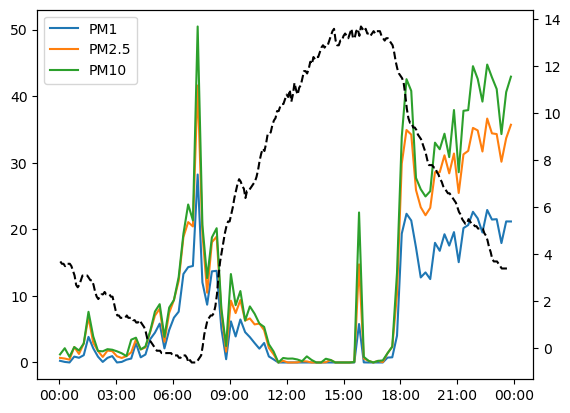

In [9]:
# Creating a figure, this will help if you work on scripts
plt.figure()

# Here plot all of the series
plt.plot(airnote_time, pm1, label = 'PM1')
plt.plot(airnote_time, pm25, label = 'PM2.5')
plt.plot(airnote_time, pm10, label = 'PM10')

# Adding a legend
plt.legend()

ax2 = plt.gca().twinx()
ax2.plot(davis_time, davis_temp, 'k--', label = 'Temperature')

# Setting up the time axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))




# Here add the x and y labels, and the title



We can observe that the plot is created blue, change it to black, or another color.
Now we want to add the x and y labels

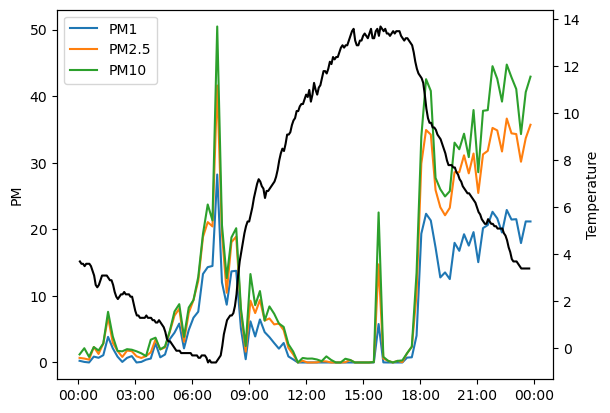

In [10]:
# Creating a figure, this will help if you work on scripts
plt.figure()

# Here plot all of the series


plt.plot(airnote_time, pm1, label = 'PM1')
plt.plot(airnote_time, pm25, label = 'PM2.5')
plt.plot(airnote_time, pm10, label = 'PM10')
# Adding the y label for the first y axis
plt.ylabel('PM')

# Adding a legend
plt.legend()

ax2 = plt.gca().twinx()
ax2.plot(davis_time, davis_temp, c = 'k')
ax2.set_ylabel('Temperature')

# Setting up the time axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))


We can see that the code gets messy, we need to be very careful into what axis to use when, the order, and even when to use `plt.ylabel` and `ax2.set_ylabel`. For that, we will start using a general convention, using pure axes and pure figs.

It's important for the next step too, so let's take a look.

### 2.1. Creating `fig, ax` objects

In many Python tutorials you will see the generation of a plot in two ways: using `fig, ax = plt.subplots()` or `fig = plt.figure() ; ax = plt.axes()`. For consistency we will use the first method, in this [forum post](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots) you can see some explanations on why do people use this.

In general when we have these two objects separately we can to the following:

 - Using `fig` we do general things of the figure, like exporting it or setting up subplots
 - Using `ax` we are caring of the frame or axis, we can create its twin or to changes on each ax.
 
To create them, we do:

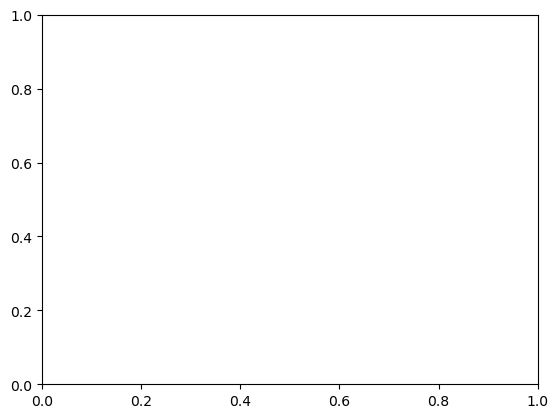

In [11]:
fig, ax = plt.subplots()

You can see that these are an empty figure, let's replicate the last plot using this tool.



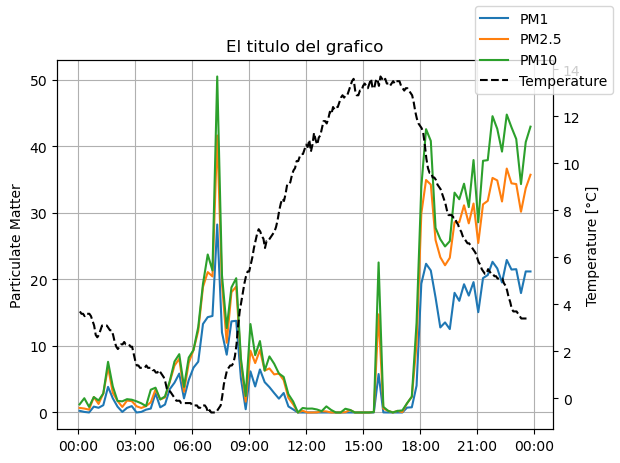

In [17]:
## EXAMPLE TO BE WORKED WITH THE INSTRUCTOR
fig, ax = plt.subplots()

# PLotting in the first axis
ax.plot(airnote_time, pm1, label = 'PM1')
ax.plot(airnote_time, pm25, label = 'PM2.5')
ax.plot(airnote_time, pm10, label = 'PM10')
ax.set_ylabel('Particulate Matter')
ax.grid()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_title('El titulo del grafico')

## Creating the twin axis
ax2 = ax.twinx()
# Plotting in the twin axis
ax2.plot(davis_time, davis_temp, 'k--',label = 'Temperature')
ax2.set_ylabel('Temperature [°C]')

## Working in the figure itself
fig.legend()
fig.savefig('figura1.png', dpi = 300)

<details><summary><b><font color="BLACK">If the instructor is not available, click here</font></b></summary>

```
# Creating these two objects
fig, ax = plt.subplots()


## WORKING IN THE FIRST AXIS
ax.plot(airnote_time, pm1, label = 'PM1')
ax.plot(airnote_time, pm25, label = 'PM2.5')
ax.plot(airnote_time, pm10, label = 'PM10')
ax.grid()
ax.set_xlabel('Local Time')
ax.set_ylabel('PM')

ax.set_title('Temperature and Particulate Matter')

## SECOND AXIS
#creating its twin
ax2 = ax.twinx()
ax2.plot(davis_time, davis_temp, 'k--',label = 'Temp')
ax2.set_ylabel('Temperature [°C]')

# setting up the time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))


## GENERAL THINGS IN THE FIGURE
fig.legend()
fig.savefig('figs/temp_pm.png', dpi = 300)# reading the data
airnote_pth = 'data_FabForno/Airnote_forno.csv'
airnote = pd.read_csv(airnote_pth)

# getting the desired columns
airnote_time = pd.to_datetime(airnote[['Year','Month','Day','Hour','Minute']])
pm1 = airnote['PM1']
pm25 = airnote['PM2.5']
pm10 = airnote['PM10']
```

## 3. Creating plots automatically
We enter a more general topic, let's take for example the Davis dataset, where we know we have three days of data and let's create a separate plot for each day automatically.

Let's see our original data, which was stored in `davis`

In [18]:
davis

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Temp,In Hum,In Dew,In Heat,In EMC,In Air Density,Wind Samp,Wind Tx,ISS Recept,Arc.\n Int.
0,25/07/23,0:05,4.4,4.6,4.4,15,-20.0,2.2,NW,0.67,...,19.9,20,-3.7,17.2,4.55,0.7880,90,4,85.7,5
1,25/07/23,0:10,4.3,4.4,4.3,15,-20.2,1.3,NW,0.40,...,19.9,20,-3.7,17.2,4.55,0.7881,56,4,53.3,5
2,25/07/23,0:15,4.2,4.3,4.2,16,-19.4,0.9,NW,0.27,...,19.9,20,-3.7,17.2,4.55,0.7881,101,4,96.2,5
3,25/07/23,0:20,4.2,4.2,4.2,16,-19.4,1.3,NW,0.40,...,19.9,20,-3.7,17.2,4.55,0.7882,99,4,94.3,5
4,25/07/23,0:25,4.3,4.3,4.2,15,-20.2,1.3,NNW,0.40,...,19.9,20,-3.7,17.2,4.55,0.7881,100,4,95.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,27/07/23,12:50,10.8,10.8,10.3,28,-7.0,0.4,W,0.13,...,20.5,23,-1.4,18.1,5.13,0.7806,101,4,96.2,5
730,27/07/23,12:55,10.6,10.8,10.6,29,-6.7,1.8,W,0.54,...,20.5,23,-1.4,18.1,5.13,0.7804,104,4,99.0,5
731,27/07/23,13:00,10.4,10.6,10.4,30,-6.4,3.1,SW,0.94,...,20.5,22,-2.0,18.0,4.95,0.7806,103,4,98.1,5
732,27/07/23,13:05,10.8,10.8,10.5,28,-7.0,2.7,N,0.80,...,20.5,22,-2.0,18.0,4.95,0.7804,106,4,100.0,5


I forgot to add a `datetime` column before, so let's do it now:

In [19]:
davis['datetime'] = pd.to_datetime(davis.Date + ' ' + davis.Time)

Now, we can get a column of the respective day, for example:

In [20]:
davis['day'] = davis.datetime.dt.day
davis.day

0      25
1      25
2      25
3      25
4      25
       ..
729    27
730    27
731    27
732    27
733    27
Name: day, Length: 734, dtype: int64

Now I'll explain our way of automate this:
 - Get the unique values for the column of days
 - Iterate over unique values
 - Get an auxiliary dataset where the day is equal to our iterator
 - Plot it
 - Save it with a formatted date
 - Next plot
 
We will store it in a folder called `temperature_plots`, create it if necessary

In [32]:
## EXAMPLE TO BE WORKED WITH THE INSTRUCTOR

# Getting the unique values for the day column
unique_days = davis.day.unique()

# Iterating over the unique list
for day in unique_days:

    # Getting an aux dataset which are filters for this day
    aux_data = davis[davis.day == day]
    
    # Building a title and the figure name
    date_formatted = aux_data.datetime.iloc[0]
    date_formatted = dt.datetime.strftime(date_formatted, '%d-%m-%y')
    fig_title = f'Temperature for {date_formatted}'
    fig_name = f'temperature_plots/temp_{date_formatted}.png'
    
    
    # Plotting the aux_data set
    plt.figure()
    plt.plot(aux_data.datetime, aux_data['Temp Out'])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xlabel('Local Time')
    plt.ylabel('Temperature [°C]')
    plt.title(fig_title)
    plt.savefig(fig_name, dpi = 300)
    plt.close()


    

<details><summary><b><font color="BLACK">If the instructor is not available, click here</font></b></summary>

```
# Getting the unique values
unique_days = davis.day.unique()

# Iterating over the unique days
for day in unique_days:
    # Getting an auxiliary dataset
    davis_aux = davis[davis.day == day]
    
    # Plotting the temperature
    plt.figure() #this is important to generate a new plot every iteration
    plt.plot(davis_aux.datetime, davis_aux['Temp Out'])
    plt.xlabel('Local Time')
    plt.ylabel('Temperature [°C]')
    

    # Setting up the time axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
    # Getting the name for the plot, using the first value in our aux dataset
    date0 = davis_aux.datetime.iloc[0,]
    date_f = dt.datetime.strftime(date0, '%d_%m_%Y')
    
    # Building up a figure name
    plot_name = f'temperature_plots/temperature_{date_f}.png'
    
    plt.savefig(plot_name, dpi = 300)
    plt.close() #when we will open more than 10 plots this is important
```

## 4. Creating subplots
If we have time we will work this in class.

In [35]:
davis.columns

Index(['Date', 'Time', 'Temp Out', 'Hi Temp', 'Low Temp', 'Out Hum', 'Dew Pt.',
       'Wind Speed', 'Wind Dir', 'Wind Run', 'Hi Speed', 'Hi Dir',
       'Wind Chill', 'Heat Index', 'THW Index', 'Bar', 'Rain', 'Rain Rate',
       'Heat D-D', 'Cool D-D', 'In  Temp', 'In Hum', 'In  Dew', 'In  Heat',
       'In  EMC', 'In Air Density', 'Wind Samp', 'Wind Tx', 'ISS  Recept',
       'Arc.\n Int.', 'datetime', 'day'],
      dtype='object')

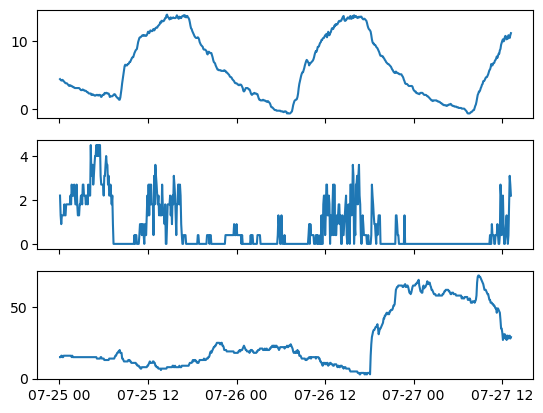

In [37]:
fig, axs = plt.subplots(3,1, sharex = True)
axs[0].plot(davis.datetime, davis['Temp Out'])
axs[1].plot(davis.datetime, davis['Wind Speed'])
axs[2].plot(davis.datetime, davis['Out Hum'])

Thanks for your assistance to this class! Hope this was useful for you :)